In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']
thisDR = 'NMF'

In [2]:
###### E-coli 
### http://archive.ics.uci.edu/ml/datasets/Ecoli
# data = pd.read_csv('datafiles/ecoli.csv')))  # very unbalanced
# class_names = np.array(['cp', 'im', 'imL', 'imS', 'imU','om','omL','pp'])
data = pd.read_csv('datafiles/ecoli-balance.csv') # balanced: merged sub-species of E-coli
class_names = np.array(['cp', 'im', 'om','pp'])
y_data = data.Y
x_data = data.loc[:,'X1':'X7']

In [3]:
one_hot = OneHotEncoder()

y_data_hot = one_hot.fit_transform(y_data.values.reshape(-1, 1)).todense()
# y_test_hot = le.transform(y_test.reshape(-1, 1)).todense()
y_data_hot.shape

(336, 4)

In [4]:

le = LabelEncoder()
le.fit(y_data.values.tolist())
y_data_le = le.transform(y_data)
y_data_le.shape

(336,)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_le, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(235, 7) (101, 7) (235,) (101,)


# 2.1 Dimensionality Reduction: Non-Negative Matrix Factorization (NMF)

In [16]:
DR = NMF(n_components = 16,
         random_state = my_random_state)

tic = time.perf_counter() 
DR.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

training time 0.017310100000031525 seconds



training time 0.01002040000003035 seconds
[-1.41036051]
199

training time 0.013326499999948282 seconds
[-0.97706014 -1.02920012]
199

training time 0.01797420000002603 seconds
[-0.72550264 -1.02277915 -1.73497185]
199

training time 0.029339500000105545 seconds
[ 0.73927974 -1.06053826 -1.76715992  0.88746788]
199

training time 0.018242900000132067 seconds
[-1.07670287 -1.0911578  -1.67796243  1.01190926 -1.49157946]
199

training time 0.01677180000001499 seconds
[-1.21367155 -0.76781566 -1.76593482  1.75553257 -1.21339542  1.19447499]
199

training time 0.017857300000059695 seconds
[ 0.38587349 -0.92745187  0.18707842  1.82274196 -1.1933957   1.98999588
 -0.27423702]
199

training time 0.017835999999988417 seconds
[-1.22611635 -0.37519786  0.87098007  1.18257774 -0.53051741 -0.78122705
  0.11981779 -1.16121265]
199

training time 0.020117600000048697 seconds
[-1.48370798  0.05013881 -0.48926666  1.02434949 -0.20856834 -1.1952533
 -0.6198057  -0.59008862 -1.40284473]
199

training ti

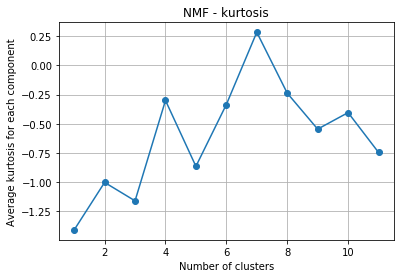

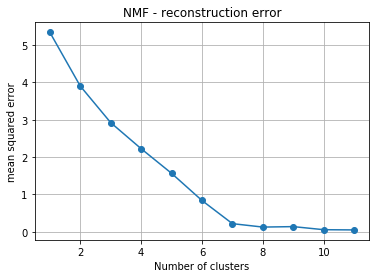

In [21]:
# Kurtosis & Reconstruction Error
numfeatures = x_train.shape[1]
numfeatures = 11
kurtosis_all = []
reconstr_err_all = []
for i in range(1, 1+numfeatures):
    DR = NMF(n_components = i, random_state = my_random_state)
    
    tic = time.perf_counter() 
    DR.fit(x_train)
    toc = time.perf_counter() 
    print(f"training time {toc - tic} seconds")
    
    kurt = kurtosis(DR.components_.T)
    print(kurt)
    kurtosis_all.append(np.mean(kurt))
    print(DR.n_iter_)
    reconstr_err_all.append(DR.reconstruction_err_)
    print()

plt.figure()
plt.plot(range(1,1+numfeatures), kurtosis_all, marker = 'o')
plt.title(f'{thisDR} - kurtosis')
plt.xlabel('Number of clusters')
plt.ylabel('Average kurtosis for each component')
plt.grid()
plt.savefig(f'part2/{thisDR}_kurtosis.png')
plt.show()


plt.figure()
plt.plot(range(1,1+numfeatures), reconstr_err_all, marker = 'o')
plt.title(f'{thisDR} - reconstruction error')
plt.xlabel('Number of clusters')
plt.ylabel('mean squared error')
plt.grid()
plt.savefig(f'part2/{thisDR}_mse.png')
plt.show()

In [47]:
# 7 component is best ?

best_n_components = 4
bestDR = NMF(n_components=best_n_components, random_state = my_random_state)
x_train_transform = bestDR.fit_transform(x_train)
x_test_transform = bestDR.fit_transform(x_test)
x_train_inverse = bestDR.inverse_transform(x_train_transform)

# Reconstruction Error
mse = np.sum(np.square(x_train.values - x_train_inverse))/x_train_inverse.size
print('MSE: ', mse)
#  MSE:  0.002285813672259965 for n=4

MSE:  0.04475850003280163


In [48]:
x_train_transform

array([[0.10951872, 0.14036293, 0.31838344, 0.0943281 ],
       [0.08954956, 0.03394286, 0.3393806 , 0.14774645],
       [0.2501965 , 0.03733505, 0.12786255, 0.20483546],
       [0.26262204, 0.19537517, 0.17765981, 0.10893452],
       [0.17929595, 0.24627037, 0.26800672, 0.07837866],
       [0.16526504, 0.0281456 , 0.33477626, 0.04276972],
       [0.26649639, 0.06831583, 0.14623177, 0.18270849],
       [0.25764169, 0.07353012, 0.22662229, 0.06598897],
       [0.23581337, 0.27840218, 0.12309425, 0.1967135 ],
       [0.25820025, 0.09309755, 0.34663512, 0.11536091],
       [0.12660991, 0.0982118 , 0.28214115, 0.11491869],
       [0.13835011, 0.22460752, 0.26737597, 0.13622541],
       [0.25175564, 0.05720741, 0.11742381, 0.15066713],
       [0.29593543, 0.12724289, 0.12105215, 0.08956333],
       [0.26672927, 0.20455012, 0.17413155, 0.03419339],
       [0.12584627, 0.21668063, 0.27415377, 0.09822181],
       [0.13901366, 0.11468131, 0.26726738, 0.12026771],
       [0.16685712, 0.09325518,

In [49]:
x_train_inverse

array([[0.78671068, 0.52921652, 0.28027149, ..., 0.2613067 , 0.55169919,
        0.33740494],
       [0.84015567, 0.52215079, 0.26111902, ..., 0.29813319, 0.38835686,
        0.16319743],
       [0.41768206, 0.51678956, 0.51304456, ..., 0.51293627, 0.26106916,
        0.30630383],
       ...,
       [0.37506093, 0.64637921, 0.5878906 , ..., 0.40306055, 0.62794526,
        0.66112119],
       [0.71246081, 0.54312696, 0.28848871, ..., 0.24118499, 0.40867718,
        0.22102628],
       [0.78494165, 0.48346172, 0.2553285 , ..., 0.29032292, 0.43419456,
        0.22804145]])

# 2.1.1. after dimensional reduction: KMeans

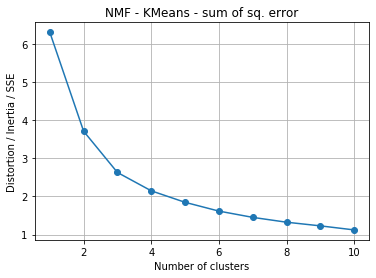

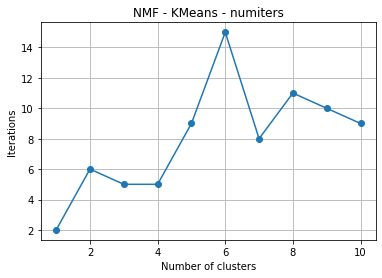

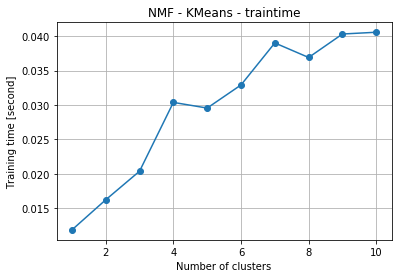

In [50]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    print()
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title(f'{thisDR} - {thisClust} - sum of sq. error')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## n=4

In [51]:
# the best n_clusters determined to be 4 (same as the original labeling)
km4 = KMeans(n_clusters = 4, random_state = my_random_state)


tic = time.perf_counter() 
km4.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km4.cluster_centers_)
print(km4.labels_)
print(km4.inertia_)
print(km4.n_iter_)

training time 0.03317890000016632 seconds

[[0.14481811 0.08375713 0.30370311 0.09352152]
 [0.25985275 0.07796492 0.14016071 0.20615462]
 [0.27438614 0.23980142 0.14430502 0.09117955]
 [0.12802659 0.21187247 0.29033285 0.15643779]]
[0 0 1 2 3 0 1 0 2 0 0 3 1 2 2 3 0 0 3 0 0 0 0 0 2 0 0 0 3 0 1 3 2 3 0 3 0
 1 1 1 1 1 1 2 3 3 1 3 1 0 0 0 2 2 0 0 2 2 0 0 1 3 3 2 1 1 0 1 1 0 0 0 3 0
 1 3 1 1 0 0 0 0 3 2 0 1 0 0 1 2 3 0 1 0 0 1 2 2 0 1 2 0 3 3 2 3 2 1 0 2 3
 1 0 0 1 2 0 2 1 1 0 2 1 3 0 1 0 2 1 3 1 2 1 0 2 1 3 3 0 2 0 1 0 0 2 2 2 3
 0 3 1 3 0 1 0 0 0 1 2 1 2 3 0 0 2 1 0 0 0 1 0 1 0 1 2 0 2 2 2 1 3 2 0 0 2
 3 1 2 1 0 0 0 0 0 0 0 0 3 3 0 2 1 0 2 0 2 3 3 1 3 1 0 2 2 1 1 2 3 0 0 2 2
 1 3 1 0 2 2 0 0 1 1 2 0 0]
2.147441190835139
5


[[81  1  6  6]
 [ 1 48 31  2]
 [ 5  0  0 12]
 [ 2  2  1 37]]
Prediction accuracy on train set: 0.7063829787234043


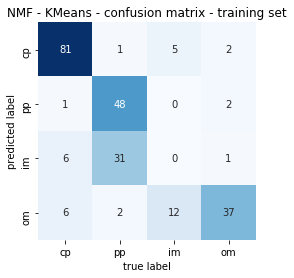

In [60]:
species = ['cp','pp','im','om']
y_train_km4 = []
for l in km4.labels_:
    y_train_km4.append(species[l])


train_confmat_km4 = confusion_matrix(le.inverse_transform(y_train), y_train_km4)
train_accu_km4 = accuracy_score(le.inverse_transform(y_train), y_train_km4)
print(train_confmat_km4)

print(f"Prediction accuracy on train set: {train_accu_km4}")


import seaborn as sns
# species.reverse() # for plotting
sns.heatmap(train_confmat_km4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')


In [61]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km4.inertia_)
score = silhouette_score(x_train_transform, km4.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_km4)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  2.147441190835139
Silhouette score:  0.36134384587069174
Adjusted Mutual Information (AMI) score:  0.5431254504588123


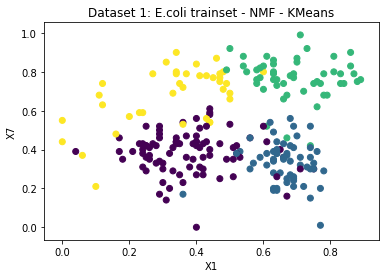

In [62]:
plt.scatter(x_train.X1,x_train.X7, c=km4.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [63]:
tic = time.perf_counter() 
y_test_predict4 = km4.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()
y_test_predict4

testing time 0.0007340999995903985 seconds



array([3, 2, 0, 2, 1, 2, 0, 1, 3, 1, 3, 0, 3, 1, 1, 1, 1, 1, 3, 2, 1, 2,
       2, 2, 3, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 2, 0, 1, 3, 2, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1])

[[44  0  0  5]
 [ 0 18  1 15]
 [ 7  0  1  0]
 [ 6  0  4  0]]
Prediction accuracy on test set: 0.6237623762376238


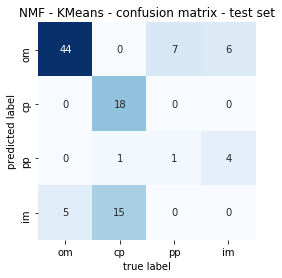

In [68]:
species = ['om','cp','pp','im']
y_test_km4 = []
for pred in y_test_predict4:
    y_test_km4.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_km4 = confusion_matrix(le.inverse_transform(y_test), y_test_km4)
test_accu_km4 = accuracy_score(le.inverse_transform(y_test), y_test_km4)
print(test_confmat_km4)
print(f"Prediction accuracy on test set: {test_accu_km4}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_km4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

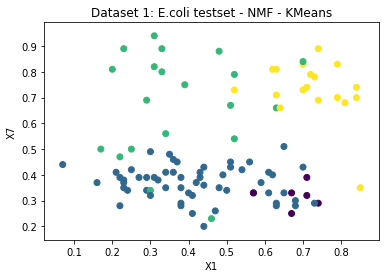

In [64]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli testset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [69]:
# Evaluate quality of clusters
print('test set')
score = silhouette_score(x_test_transform, y_test_predict4)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_km4)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.26388781259953636
Adjusted Mutual Information (AMI) score:  0.5008574751931517


## n=3

In [70]:
# the best n_clusters determined to be 4 (same as the original labeling)
best_n_clusters = 3
km = KMeans(n_clusters = best_n_clusters, random_state = my_random_state)


tic = time.perf_counter() 
km.fit(x_train_transform)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)

training time 0.022763800000120682 seconds

[[0.25939637 0.07885583 0.14382972 0.19648593]
 [0.13384892 0.11096901 0.30755084 0.1109429 ]
 [0.25586033 0.24584754 0.16233758 0.09917244]]
[1 1 0 2 2 1 0 0 2 1 1 1 0 0 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 0 2 2 2 1 1 1
 0 0 0 0 0 0 2 1 1 0 1 0 1 1 1 2 2 1 1 2 2 1 1 0 1 1 2 0 0 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 2 1 1 0 1 1 0 2 2 1 0 2 1 2 1 2 1 2 0 1 2 1
 0 1 1 0 2 1 2 0 0 1 2 0 2 1 0 1 2 0 1 0 2 0 1 2 0 2 1 1 2 1 0 1 1 2 2 2 2
 1 1 0 1 1 0 1 1 1 0 2 0 2 1 1 1 2 0 0 1 1 0 1 0 1 0 2 1 2 2 2 0 2 2 1 1 2
 1 0 2 0 1 1 1 1 1 1 1 1 2 1 1 2 0 1 2 1 2 1 1 0 1 0 1 2 2 0 0 2 1 1 1 2 2
 0 2 0 1 2 2 1 1 0 0 2 1 1]
2.629157542301437
5


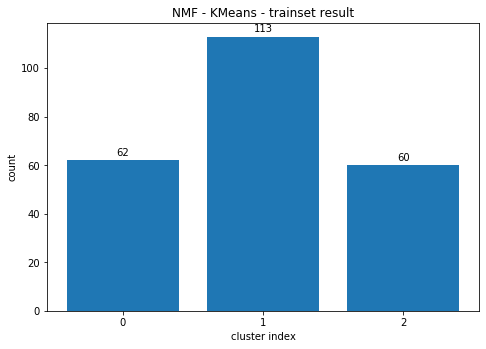

In [71]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in km.labels_:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts)
plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [72]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km.inertia_)
score = silhouette_score(x_train_transform, km.labels_)
print('Silhouette score: ', score)
# ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), x_train_km)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), km.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  2.629157542301437
Silhouette score:  0.39681435866425135
Adjusted Mutual Information (AMI) score:  0.5063656165017227


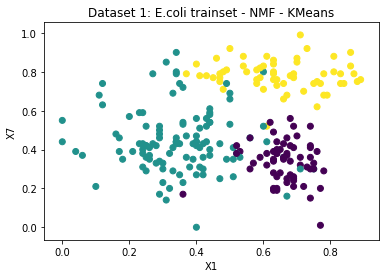

In [73]:
plt.scatter(x_train.X1,x_train.X7, c=km.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [74]:


tic = time.perf_counter() 
y_test_predict = km.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0008606999999756226 seconds



array([2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0])

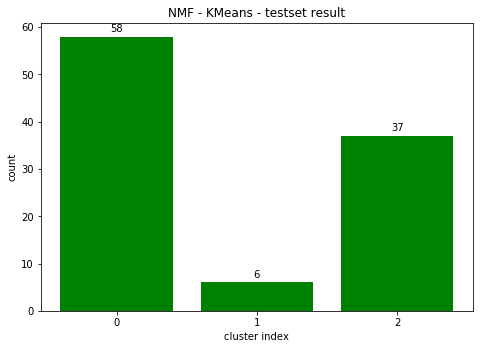

In [75]:
clusterindices = [str(e) for e in range(best_n_clusters)]
counts = np.zeros(best_n_clusters)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [76]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.2995167772294482
Adjusted Mutual Information (AMI) score:  0.5124033478863043


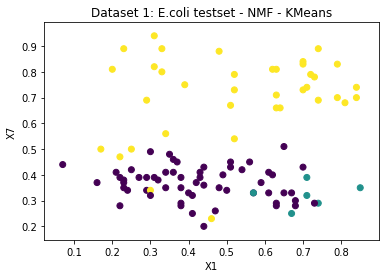

In [77]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli testset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 2.1.1. after dimensional reduction: Expectation Maximization (EM)

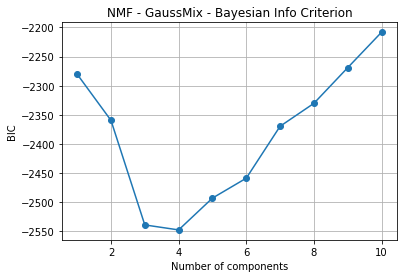

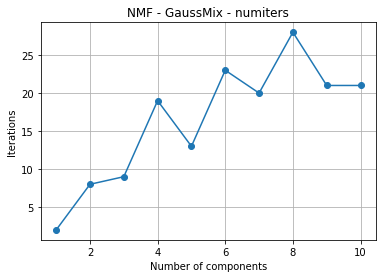

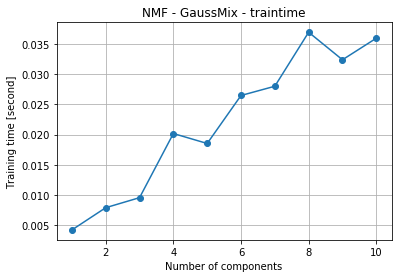

In [78]:
thisClust = 'GaussMix'
#  Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train_transform)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train_transform))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title(f'{thisDR} - {thisClust} - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title(f'{thisDR} - {thisClust} - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title(f'{thisDR} - {thisClust} - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig(f'part2/{thisDR}_{thisClust}_traintime.png')
plt.show()

## best_n_component = 4

In [79]:
# the best n_clusters determined to be 4 (same as the original labeling)

best_n_component = 4
gm4 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm4.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict4 = gm4.predict(x_train_transform)
y_train_predict4

training time 0.013744500000029802 seconds



array([3, 3, 1, 2, 2, 3, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 1, 0, 3, 1, 1, 1, 1, 1, 3, 2,
       2, 3, 1, 0, 1, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 0, 2, 2, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3,
       1, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 0, 2, 3, 2, 1, 3, 2,
       2, 1, 3, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 3, 1, 3, 2, 1, 2, 1, 2,
       1, 3, 2, 3, 2, 0, 3, 2, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1,
       3, 3, 3, 1, 2, 1, 2, 0, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 2, 3,
       2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 1, 2, 1, 3, 3, 3, 3, 3, 0, 3, 3, 2,
       2, 3, 2, 1, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 2, 2, 1, 1, 2, 2, 3, 3,
       2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3], dtype=int64)

[[91  0  0  3]
 [ 3 70  7  2]
 [ 0  0  1 16]
 [ 4  1  0 37]]
Prediction accuracy on train set: 0.8468085106382979


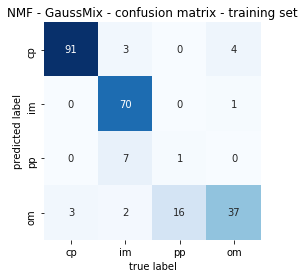

In [80]:
species = ['om','pp','im','cp']
# species = ['pp','om','im','cp']
x_train_gm4 = []
for l in y_train_predict4:
    x_train_gm4.append(species[l])


# train_confmat_gm4 = confusion_matrix(le.inverse_transform(y_train).reshape(-1), np.array(x_train_gm4).reshape(-1))
train_confmat_gm4 = confusion_matrix(le.inverse_transform(y_train), x_train_gm4)
train_accu_gm4 = accuracy_score(le.inverse_transform(y_train), x_train_gm4)
print(train_confmat_gm4)

print(f"Prediction accuracy on train set: {train_accu_gm4}")

species.reverse() # for plotting
sns.heatmap(train_confmat_gm4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - training set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_train.png')


In [81]:
# Evaluate quality of clusters
print('training set')
# print('Inertia: ', km4.inertia_)
score = silhouette_score(x_train_transform, y_train_predict4)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict4)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Silhouette score:  0.3242433538880072
Adjusted Mutual Information (AMI) score:  0.6926978769055875


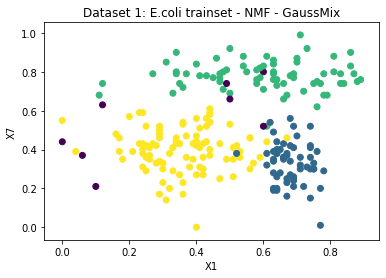

In [82]:
plt.scatter(x_train.X1,x_train.X7, c=y_train_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [83]:

tic = time.perf_counter() 
y_test_predict4 = gm4.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict4

testing time 0.0007660999999643536 seconds



array([2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3, 1,
       1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1], dtype=int64)

[[41  1  7  0]
 [ 0 30  2  2]
 [ 8  0  0  0]
 [10  0  0  0]]
Prediction accuracy on test set: 0.7029702970297029


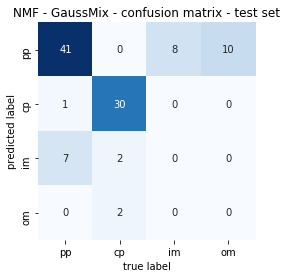

In [89]:


# species = ['om','pp','im','cp']
species = ['pp','cp','im','om']
y_test_gm4 = []
for pred in y_test_predict4:
    y_test_gm4.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(le.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


test_confmat_gm4 = confusion_matrix(le.inverse_transform(y_test), y_test_gm4)
test_accu_gm4 = accuracy_score(le.inverse_transform(y_test), y_test_gm4)
print(test_confmat_gm4)
print(f"Prediction accuracy on test set: {test_accu_gm4}")


# species.reverse() # for plotting
sns.heatmap(test_confmat_gm4.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title(f'{thisDR} - {thisClust} - confusion matrix - test set')
plt.savefig(f'part2/{thisDR}_{thisClust}_confusion_test.png')

In [90]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.2995167772294482
Adjusted Mutual Information (AMI) score:  0.5124033478863043


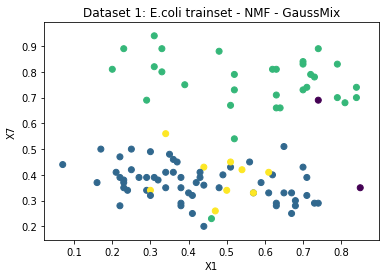

In [86]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict4, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

# best_n_component = 3

In [91]:
# 3 is determined to be the best number of components
best_n_component = 3
gm = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm.fit(x_train_transform)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm.predict(x_train_transform)
y_train_predict

training time 0.010969699999805016 seconds



array([0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0], dtype=int64)

In [92]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train_transform, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(le.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  0.36283855401682275
Adjusted Mutual Information (AMI) score:  0.6758542903143996


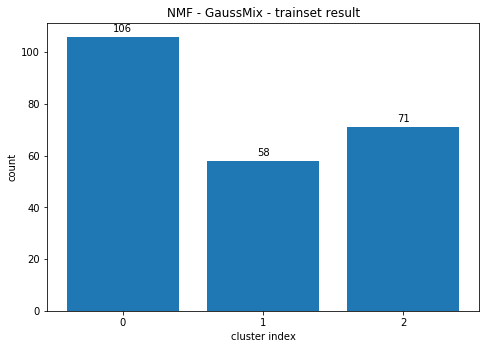

In [93]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title(f'{thisDR} - {thisClust} - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_train.png')
plt.show()

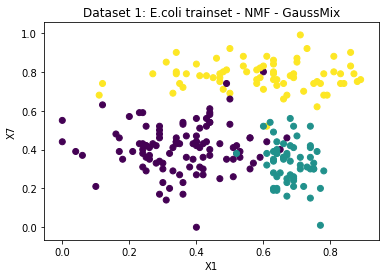

In [94]:
plt.scatter(x_train.X1,x_train.X7, c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [95]:


tic = time.perf_counter() 
y_test_predict = gm.predict(x_test_transform)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.0006745000000591972 seconds



array([2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1], dtype=int64)

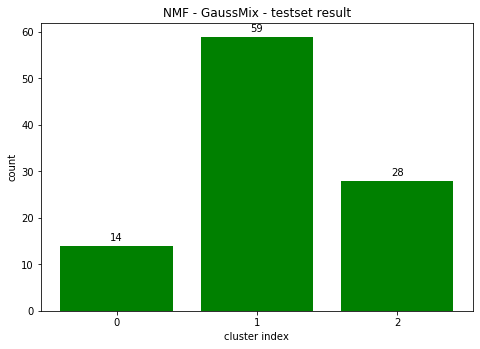

In [96]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title(f'{thisDR} - {thisClust} - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig(f'part2/{thisDR}_{thisClust}_test.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [97]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(le.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test_transform, y_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(le.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.19387172805451316
Adjusted Mutual Information (AMI) score:  0.4738718555351759


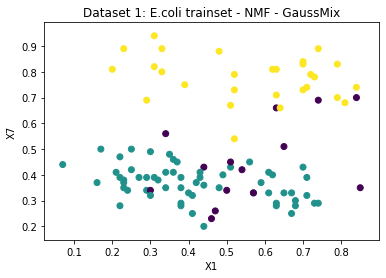

In [98]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part2/{thisDR}_{thisClust}_scatter_test.png')
plt.show()